In [1]:
# !pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 37.5 MB/s eta 0:00:00


In [23]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_cv
import seaborn as sn
import numpy as np

keras.utils.set_random_seed(31)

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [27]:
def plot_sample(img):
  plt.figure(figsize=(10,1))
  plt.imshow(img)
  plt.plot()

Label is 6


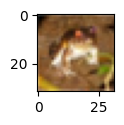

In [28]:
# sample image

plot_sample(x_train[0])
print("Label is", y_train[0][0])

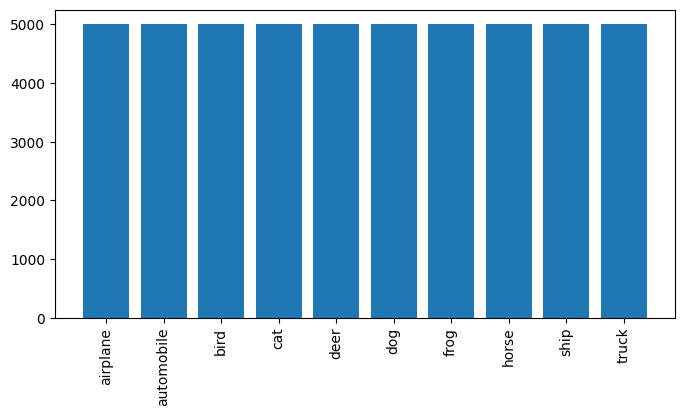

In [29]:
# class distribution
classes = ["airplane",
          "automobile",
          "bird",
          "cat",
          "deer",
          "dog",
          "frog",
          "horse",
          "ship",
          "truck"]

class_dist = {i:0 for i in classes}
for i in y_train:
  class_dist[classes[i[0]]] += 1

plt.figure(figsize=(8,4))
plt.bar(class_dist.keys(), class_dist.values())
plt.xticks(rotation=90)
plt.plot();

Classes are equally distributed, so we're good.

#### Samples from different classes

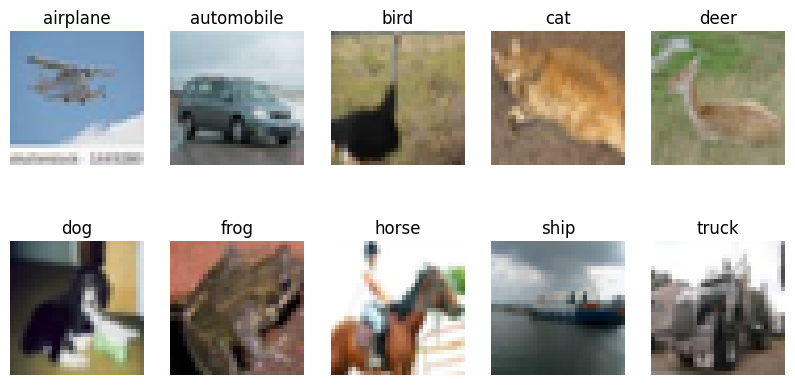

In [30]:
# samples from each class
samples = {i: None for i in classes}
for i in range(121, len(y_train)):
  if samples[classes[y_train[i][0]]] is None:
    samples[classes[y_train[i][0]]] = x_train[i]
  else:
    continue

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(samples[classes[i]])
  plt.title(classes[i])
  plt.axis("off")

#### Samples from same class

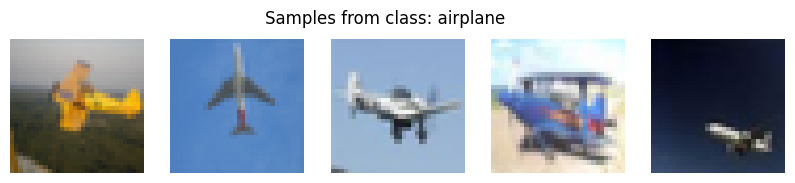

In [31]:
# different samples from one class
def plot_samples(class_name):
    samples = []
    for i in range(1231, len(y_train)):
        if len(samples) == 5:
            break
        if classes[y_train[i][0]] == class_name:
            samples.append(x_train[i])
    plt.figure(figsize=(10, 2))
    plt.suptitle(f'Samples from class: {class_name}', fontsize=12)
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(samples[i])
        plt.axis("off")

plot_samples("airplane")

### Scale and Flatten

In [32]:
# standardize the data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [33]:
# flatten the data
x_train_flat = x_train_scaled.reshape(-1, 32*32*3)
x_test_flat = x_test_scaled.reshape(-1, 32*32*3)

In [34]:
print(x_train_flat.shape)
print(x_test_flat.shape)

(50000, 3072)
(10000, 3072)


### Regular NN

In [36]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(3072,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,746,506 (6.66 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.2745 - loss: 1.9907
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3808 - loss: 1.7208
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4142 - loss: 1.6263
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4401 - loss: 1.5617
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4597 - loss: 1.5146
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4678 - loss: 1.4808
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4782 - loss: 1.4546
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4899 - loss: 1.4183
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4985 - loss: 1.3925
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5103 - loss: 1.3706


In [39]:
_, acc = model.evaluate(x_train_flat, y_train)
print("Training Accuracy = ", (acc * 100.0), "%")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5147 - loss: 1.3591
Training Accuracy =  51.17800235748291 %


In [40]:
_, acc = model.evaluate(x_test_flat, y_test)
print("Training Accuracy = ", (acc * 100.0), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4914 - loss: 1.4802
Training Accuracy =  48.649999499320984 %


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_test_flat)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.61      0.63      0.62      1000
           2       0.38      0.33      0.35      1000
           3       0.37      0.28      0.32      1000
           4       0.36      0.46      0.41      1000
           5       0.45      0.31      0.37      1000
           6       0.44      0.60      0.51      1000
           7       0.61      0.47      0.53      1000
           8       0.61      0.64      0.62      1000
           9       0.51      0.58      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



### CNN Model

In [47]:
model = keras.Sequential([
    # convolution
    keras.layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, padding='same', kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,251,274 (12.40 MB)

 Trainable params: 3,251,274 (12.40 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3591 - loss: 1.7111 - val_accuracy: 0.6254 - val_loss: 1.0604
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6127 - loss: 1.1000 - val_accuracy: 0.6819 - val_loss: 0.9177
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6813 - loss: 0.9209 - val_accuracy: 0.7184 - val_loss: 0.8297
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7223 - loss: 0.7901 - val_accuracy: 0.7211 - val_loss: 0.8128
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7522 - loss: 0.7116 - val_accuracy: 0.7125 - val_loss: 0.8778
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7699 - loss: 0.6582 - val_accuracy: 0.7126 - val_loss: 0.8540
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7946 - loss: 0.5919 - val_accuracy: 0.7291 - val_loss: 0.8205
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8068 - loss: 0.5540 -

In [49]:
_, acc = model.evaluate(x_train_scaled, y_train)
print("Training Accuracy = ", (acc * 100.0), "%")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8823 - loss: 0.3452
Training Accuracy =  88.1879985332489 %


In [50]:
_, acc = model.evaluate(x_test_scaled, y_test)
print("Training Accuracy = ", (acc * 100.0), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7483 - loss: 0.8155
Training Accuracy =  74.43000078201294 %


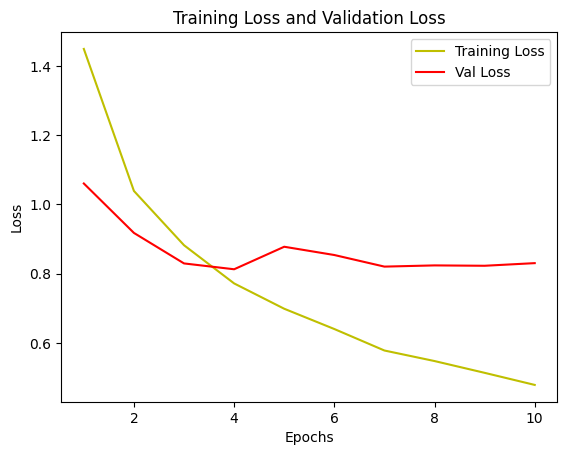

In [51]:
# plot the loss curve
loss_curve = history.history["loss"]
val_loss_curve = history.history["val_loss"]
epochs = range(1, len(loss_curve) + 1)
plt.plot(epochs, loss_curve, 'y', label="Training Loss")
plt.plot(epochs, val_loss_curve, 'r', label="Val Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

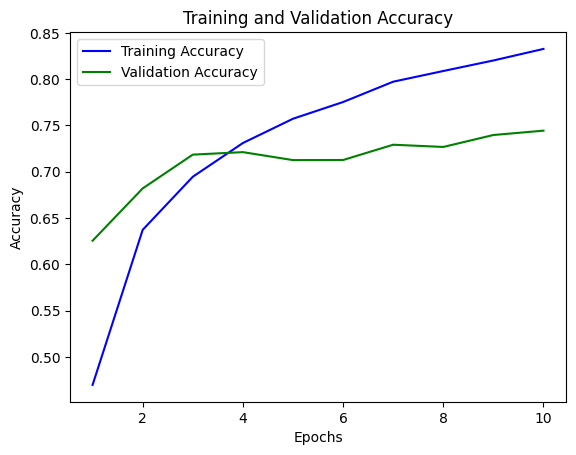

In [52]:
# plot the accuracy curve
acc_curve = history.history["accuracy"]
val_acc_curve = history.history["val_accuracy"]
epochs = range(1, len(acc_curve) + 1)
plt.plot(epochs, acc_curve, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_curve, 'g', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
y_pred = model.predict(x_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1000
           1       0.87      0.86      0.87      1000
           2       0.69      0.60      0.64      1000
           3       0.54      0.57      0.56      1000
           4       0.72      0.62      0.66      1000
           5       0.68      0.65      0.67      1000
           6       0.77      0.83      0.80      1000
           7       0.76      0.81      0.79      1000
           8       0.89      0.82      0.85      1000
           9       0.80      0.84      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



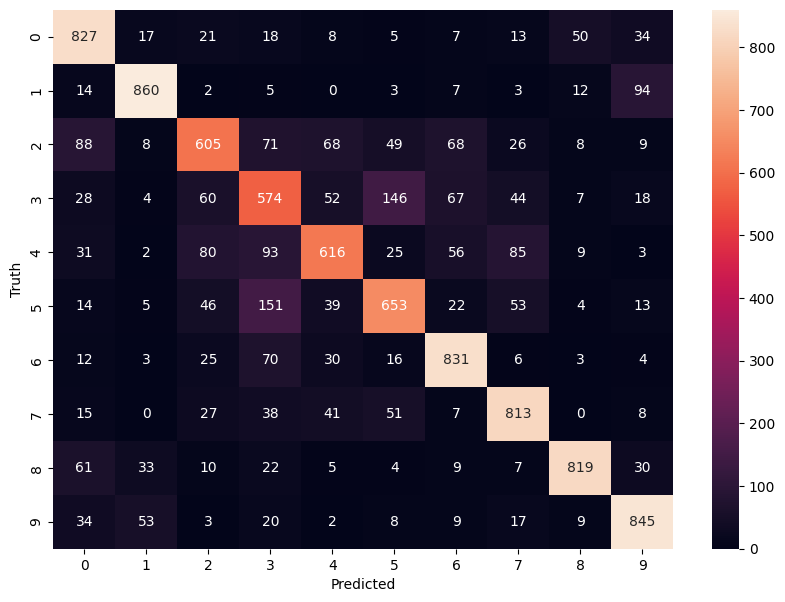

In [54]:
cm = tf.math.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Data Augmentation

In [7]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
IMAGE_SIZE = 32

In [8]:
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255), augmentations_per_image=3, magnitude=0.2
)

In [9]:
def prepare_image_dataset(dataset, shuffle=False, augment=False) -> tf.data.Dataset:
    if shuffle:
        dataset = dataset.shuffle(BATCH_SIZE * 1000)

    dataset = dataset.batch(BATCH_SIZE)

    dataset = dataset.map(
        lambda x, y: (tf.image.resize(x, (IMAGE_SIZE, IMAGE_SIZE)), y),
        num_parallel_calls=AUTO,
    )

    if augment:
        dataset = dataset.map(
            lambda x, y: (rand_augment(x), y),  # RandAugment can process it
            num_parallel_calls=AUTO,
        )

    dataset = dataset.map(
        lambda x, y: (tf.cast(x, tf.float32) / 255.0, y),
        num_parallel_calls=AUTO,
    )

    return dataset.prefetch(AUTO)

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_ds = prepare_image_dataset(train_ds, shuffle=True, augment=True)
test_ds = prepare_image_dataset(test_ds)

In [11]:
train_ds.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))

In [12]:
train_ds.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=1563>

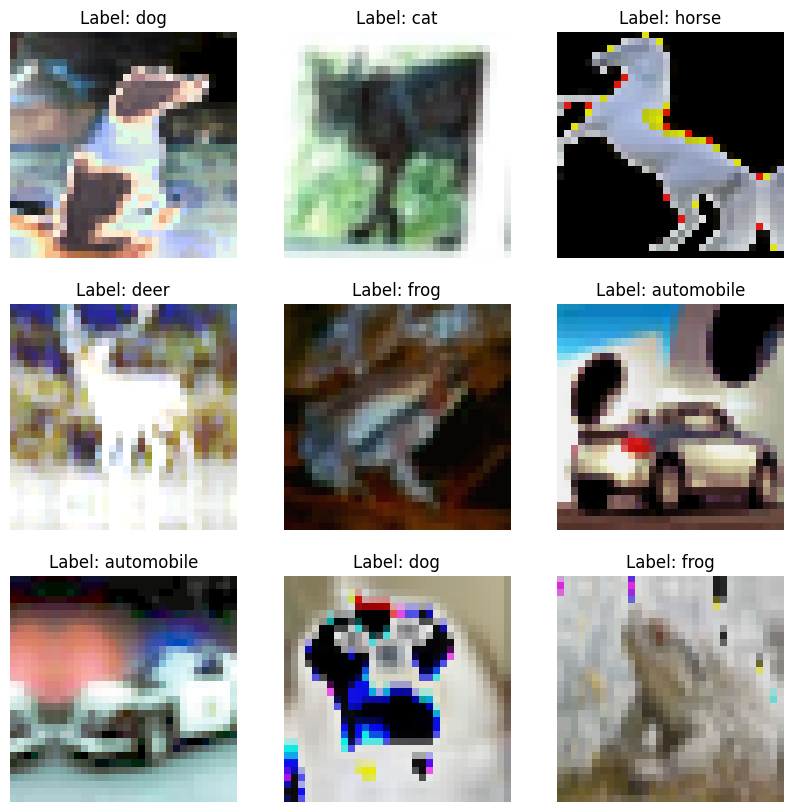

In [13]:
sample_images, labels = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i, image in enumerate(sample_images[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {classes[int(labels[i])]}")
    plt.axis("off")

In [14]:
model = keras.Sequential([
    # convolution
    keras.layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, padding='same', kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,251,274 (12.40 MB)

 Trainable params: 3,251,274 (12.40 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
EPOCHS = 50

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 40ms/step - accuracy: 0.2221 - loss: 2.0508 - val_accuracy: 0.5101 - val_loss: 1.3441
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.4210 - loss: 1.5949 - val_accuracy: 0.5766 - val_loss: 1.1850
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.4750 - loss: 1.4638 - val_accuracy: 0.6316 - val_loss: 1.0393
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.5174 - loss: 1.3617 - val_accuracy: 0.6599 - val_loss: 0.9774
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.5412 - loss: 1.2976 - val_accuracy: 0.6473 - val_loss: 1.0068
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.5563 - loss: 1.2566 - val_accuracy: 0.6685 - val_loss: 0.9506
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.5701 - loss: 1.2320 - val_accuracy: 0.6919 - val_loss: 0.8721
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.5765 -

In [17]:
train_ds_original = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds_original = prepare_image_dataset(train_ds_original)

In [18]:
_, acc = model.evaluate(train_ds_original)
print("Training Accuracy = ", (acc * 100.0), "%")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8210 - loss: 0.5561
Training Accuracy =  81.97000026702881 %


In [19]:
_, acc = model.evaluate(test_ds)
print("Test Accuracy = ", (acc * 100.0), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7735 - loss: 0.6884
Test Accuracy =  77.53999829292297 %


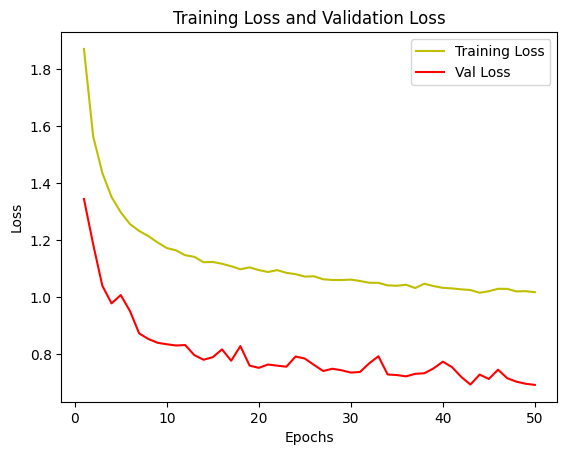

In [20]:
# plot the loss curve
loss_curve = history.history["loss"]
val_loss_curve = history.history["val_loss"]
epochs = range(1, len(loss_curve) + 1)
plt.plot(epochs, loss_curve, 'y', label="Training Loss")
plt.plot(epochs, val_loss_curve, 'r', label="Val Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

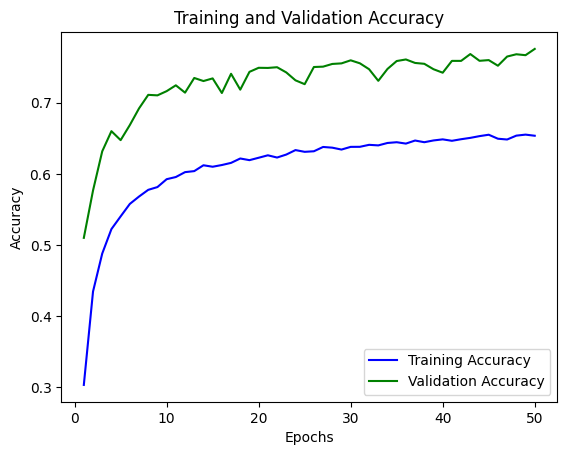

In [21]:
# plot the accuracy curve
acc_curve = history.history["accuracy"]
val_acc_curve = history.history["val_accuracy"]
epochs = range(1, len(acc_curve) + 1)
plt.plot(epochs, acc_curve, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_curve, 'g', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_ds)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1000
           1       0.89      0.91      0.90      1000
           2       0.75      0.65      0.70      1000
           3       0.64      0.49      0.56      1000
           4       0.72      0.75      0.73      1000
           5       0.70      0.66      0.68      1000
           6       0.70      0.89      0.79      1000
           7       0.81      0.85      0.83      1000
           8       0.87      0.88      0.88      1000
           9       0.91      0.81      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



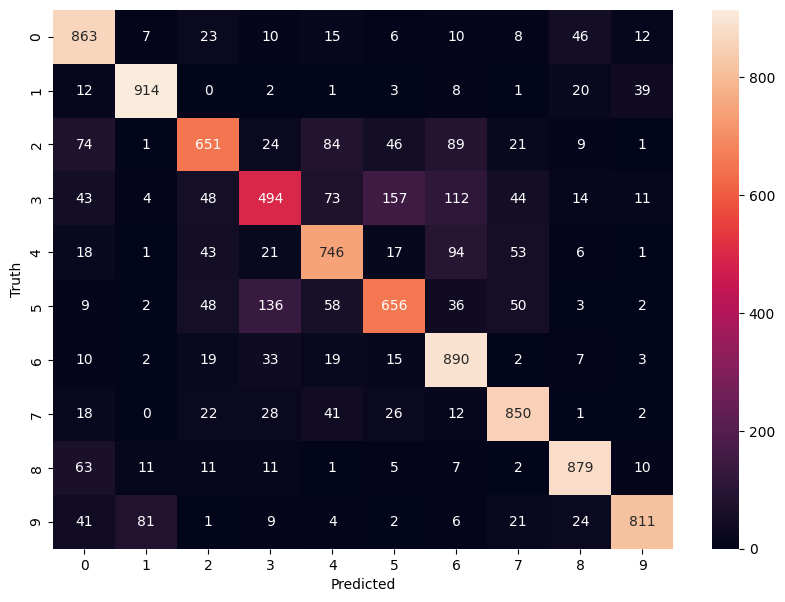

In [25]:
cm = tf.math.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Neural Network Performance Comparison on CIFAR-10

This document presents the performance of different neural network architectures trained on the **CIFAR-10** dataset with varying configurations. An architecture similar to the AlexNet is implemented in this notebook, with slight differences.

#### Model Configurations and Results

| Model Type                              | Parameters | Epochs | Training Accuracy (%) | Test Accuracy (%) |
|-----------------------------------------|-----------|--------|----------------------|------------------|
| Regular NN (No ConvNet)                 | 1.7M      | 10     | 51.17                | 48.64            |
| CNN            | 3.2M      | 10     | 88.17                | 74.43            |
| CNN + Data Augmentation       | 3.2M      | 50     | 81.97                | 77.53            |

#### Observations

1. **Regular Neural Network (No ConvNet)**
   - With 1.7M parameters and 10 epochs, the model achieved **51.17% training accuracy** and **48.64% test accuracy**.
   - The low accuracy suggests the model struggles to learn complex spatial patterns in images.

2. **CNN with Dropout Regularization**
   - With 3.2M parameters and 10 epochs, the training accuracy jumped to **88.17%**, while test accuracy reached **74.43%**.
   - This shows that convolutional layers significantly enhance feature extraction and performance.

3. **CNN with Dropout and Data Augmentation**
   - With the same 3.2M parameters but trained for 50 epochs, the model reached **81.97% training accuracy** and **77.53% test accuracy**.
   - The lower training accuracy compared to the previous CNN model is due to **dropout and data augmentation introducing regularization**.
   - However, test accuracy improved, indicating **better generalization** and reduced overfitting.

#### Conclusion

- CNN models outperform fully connected networks in image classification tasks.
- Dropout prevents overfitting, while data augmentation enhances generalization.
- Increasing epochs from 10 to 50 with dropout and augmentation improved test accuracy, demonstrating the benefits of longer training on diverse data.

